# Techniques of Handling Missing Values
1. Delete the rows
2. Mean/Median/Mode replcement
3. Random Sample Imputation
4. Capturing NaN values with a new feature
5. End of Distribution
6. Arbitrary imputation

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived','Embarked'])
df.head()

,Survived,Age,Fare,Embarked
0,0,22.0,7.2500,S
1,1,38.0,71.2833,C
2,1,26.0,7.9250,S
3,1,35.0,53.1000,S
4,0,35.0,8.0500,S


In [5]:
df.shape

(891, 4)

In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
Embarked      2
dtype: int64

## 1.Delete Rows

  * Deleting rows is optional choice we use only when we have less NaN values.
  * example in this dataset we have total 891 records deleting 10 rows of missing values doesnot impact the result

In [7]:
df[df.Embarked.isnull()]

,Survived,Age,Fare,Embarked
61,1,38.0,80.0,NaN
829,1,62.0,80.0,NaN


In [11]:
df.dropna(subset =['Embarked'],inplace=True)
#Dropna is used to drop NaN values 

In [12]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
Embarked      0
dtype: int64

In [13]:
df['Embarked'].isnull().sum()

0

## 2. Mean/Median/Mode imputation
* We basically take the average of the data, or we take the median of the data and replace all missing values with that value.
* Handles: MCAR and MAR

In [16]:
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [22]:
df.isnull().mean()
# percentage of naN values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [23]:
def imput_NaN(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [24]:
median = df.Age.median()
median

28.0

In [25]:
imput_NaN(df,'Age',median)

In [26]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [27]:
df.Age.isnull().sum()

177

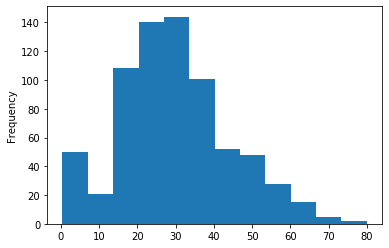

In [28]:
df.Age.plot.hist(bins=12)

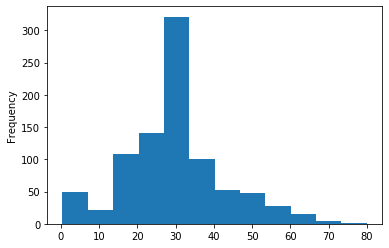

In [29]:
df.Age_median.plot.hist(bins=12)

In [30]:
print(df['Age'].std())

14.526497332334044


In [31]:
print(df['Age_median'].std())

13.019696550973194


### Advantages and disadvantages
Advantages
* Easy to implement(Robust to outliers)
* Faster way to obtain the complete dataset

Disadvantages
* Distorts the histogram — Underestimates variance.
* Change or Distortion in original variance
* Impacts corelation

## 3.  Random Sample Imputation
* In Random Sample Imputation techinque we are taking random sample observation from the dataset and use this observation to replace with NaN values.

* Data is missing at random,  Data is normally distributed
* It assumes that data are missing completely at random(MCAR).

In [92]:
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [93]:
df.shape

(891, 3)

In [94]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [95]:
df.isnull().mean()
#percentage of NAN values in dataset

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [96]:
df['Age'].dropna().sample()#It generates sample value from values in Age Cloumn.
#The purpose of dropna() is used to drop the NaN values
# sample() picking sample form the remaining datapoints

515    47.0
Name: Age, dtype: float64

In [97]:
df.Age.isnull().sum() #it returns NaN's in Age column

177

In [98]:
df.Age.dropna().sample(df.Age.isnull().sum(),random_state=0)
# This generates sample for every NaN in the Age cloumn replace with it random sample value.

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [99]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [100]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [101]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [102]:
def imput_NaN(df,variable):
    df[variable+"_random"] = df[variable]  
    #It will have the random  sample to fill the NaN
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)  
    #pandas need to have index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] =random_sample

In [103]:
imput_NaN(df,'Age')

In [104]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [105]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_random      0
dtype: int64

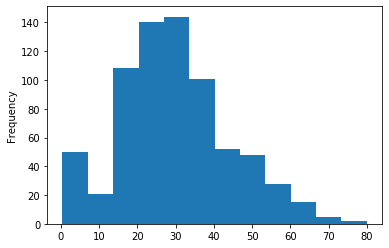

In [106]:
df.Age.plot.hist(bins=12)

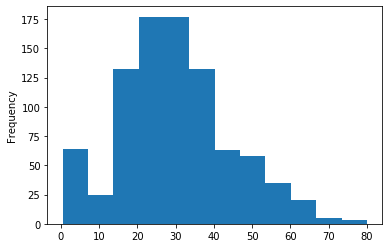

In [107]:
df.Age_random.plot.hist(bins=12)

In [91]:
# By above histogams of Age column with NaN and Age Random columns have less variance

### Advantages
1. Easy to implement
2. There is less distortion in variance

### Disadvanntages
* Every situation randomness wont work
* Doesn’t work when missing data is a high percentage of the data

# 4. Capturing NaN values with a new feature
* In this technique we create a separate label for missing values.
* The idea is to flag missing values and understand the importance of being missing.

In [108]:
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [110]:
df["Age_NaN"] = np.where(df.Age.isnull(),1,0)
#where the value is null insert 1(One) else insert 0(zero)  

In [111]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [112]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [113]:
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [116]:
# Above dataframe in Age_NaN column 1 represent corresponding age row has null value

### Advantages
* Captures the importance of missing values

### Disadavntages
* Creating additional features(Curse of dimensionality)

# 5.End of Distribution Imputation

* If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

* when to use :  Data is not missing at random; Data is skewed at the tail-end
* If normally distributed, we use the mean +/- 3 times Standard Deviation.
* If the distribution is skewed, use the IQR proximity rule.

In [138]:
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [139]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

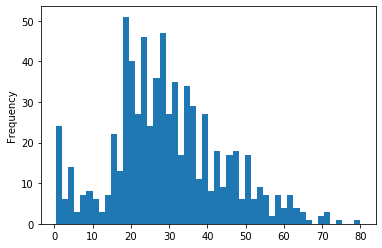

In [140]:
df.Age.plot.hist(bins=50)

In [141]:
extreme = df.Age.mean()+3*df.Age.std() #3rd STD
extreme

73.27860964406095

In [142]:
import seaborn as sns

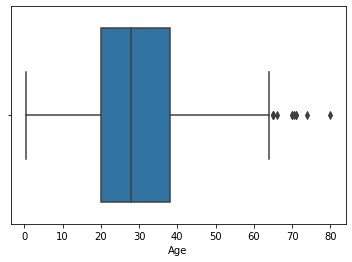

In [143]:
sns.boxplot('Age',data=df)

In [144]:
def imput_NaN(df,variable,medain,extreme):
    df[variable+"endOfDistribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace =True)

In [145]:
median = df.Age.median()
median

28.0

In [146]:
imput_NaN(df,'Age',median,extreme)

In [147]:
df.head()

,Survived,Age,Fare,AgeendOfDistribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


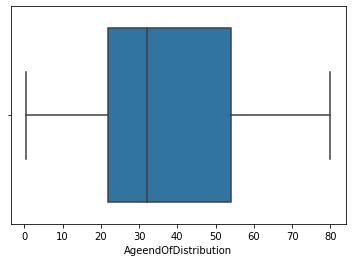

In [149]:
sns.boxplot('AgeendOfDistribution',data=df)

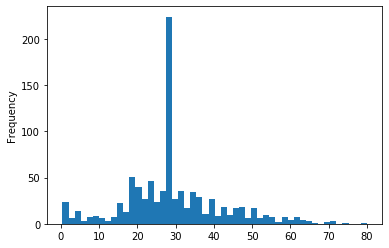

In [152]:
df.Age.plot.hist(bins=50)

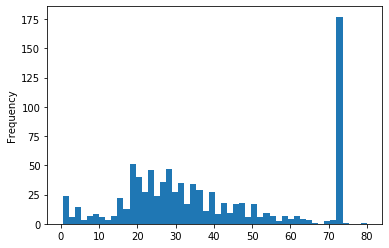

In [153]:
df.AgeendOfDistribution.plot.hist(bins=50)

#### Advantages
1. Captures imporantance of missingness if there

#### Disadvantages
1. Disorts the original distribution of variance
2. If missingness is not important, it may mask the predictive power of the original varibale by disributing its distribution
3. If the no.of NaN is big , it will mask true outliers in the distribution
4. if the no.of NaN is small,the replaced NaN may  be considered as outlier and pre-processed in a subsequent feature engineering

# 6.Arbitrary Value imputation

1. Replacing NaN by arbitrary 
2. impute the missing data with a fixed arbitrary value (a random value)
3. It is mostly used for categorical variables, but can also be used for numeric variables with arbitrary values such as 0, 999 or other similar combinations of numbers.

In [154]:
df = pd.read_csv("titanic.csv",usecols=['Fare','Age','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [155]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [156]:
def imput_NaN(df,variable):
    df[variable+"_zero"] = df[variable].fillna(0)
    df[variable+"_hundred"] = df[variable].fillna(100)

In [157]:
imput_NaN(df,'Age')

In [158]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


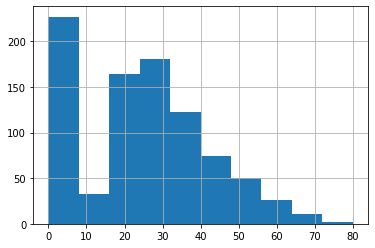

In [159]:
df.Age_zero.hist()

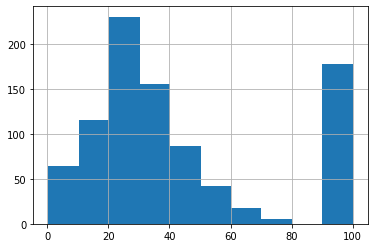

In [160]:
df.Age_hundred.hist()

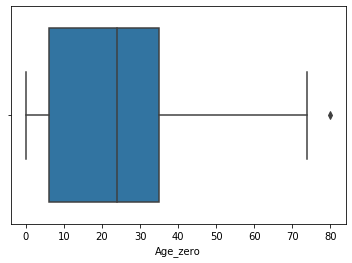

In [161]:
sns.boxplot("Age_zero",data=df)


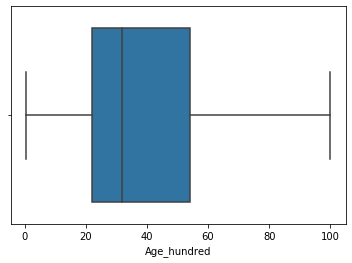

In [162]:
sns.boxplot("Age_hundred",data=df)

#### Advantages:
1. Quick and easy to implement
2. bring out underlying importance of missing values

#### Disadvantages:
1. Changes co-variance/variance; may create outliers
2. Hard to decide which value to use